# Stroke Prediction Project
This notebook demonstrates data preprocessing, visualization, model training, and evaluation for stroke prediction using a Random Forest Classifier.

In [115]:
# 1. Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
# 2. Load and Preview Dataset
data = pd.read_csv("../Data/stroke_prediction_dataset.csv")
data.dropna(inplace=True)
display(data.head())

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


In [117]:
# 3. Encode Categorical Variables (including 'Diagnosis')
le = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])

In [118]:
# 4. Drop Unnecessary Columns (but keep 'Diagnosis')
drop_cols = ['Patient ID', 'Patient Name', 'Symptoms']
for col in drop_cols:
    if col in data.columns:
        data = data.drop(col, axis=1)
display(data.head())

,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Diagnosis
0,56,1,0,1,1,3,0,130.91,22.37,2,3,2,0,1,5,3.48,1920,4238,1
1,80,1,0,0,2,3,1,183.73,32.57,2,1,1,0,0,3,1.73,2231,3733,1
2,26,1,1,1,1,1,0,189.00,20.32,1,2,0,0,1,3,7.31,2621,3324,1
3,73,1,0,0,1,1,1,185.29,27.50,2,0,2,0,0,3,5.35,3553,4454,0
4,51,1,1,1,0,3,1,177.34,29.06,0,2,1,0,1,4,6.84,1042,3957,1


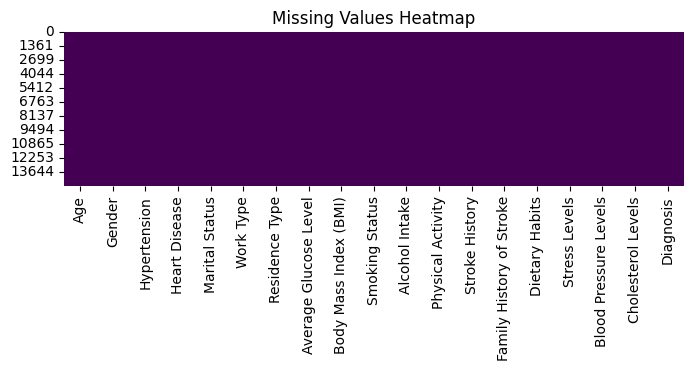

In [119]:
# 5. Data Visualization
# Visualize missing values
plt.figure(figsize=(8, 2))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

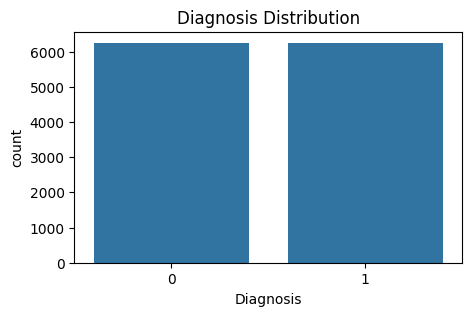

In [120]:
# Visualize class balance for Diagnosis
plt.figure(figsize=(5,3))
sns.countplot(x='Diagnosis', data=data)
plt.title('Diagnosis Distribution')
plt.show()

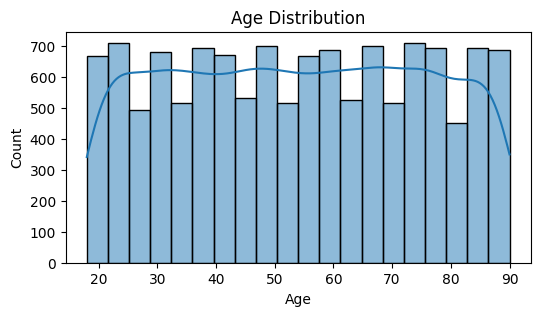

In [121]:
# Visualize Age distribution
plt.figure(figsize=(6,3))
sns.histplot(data['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.show()

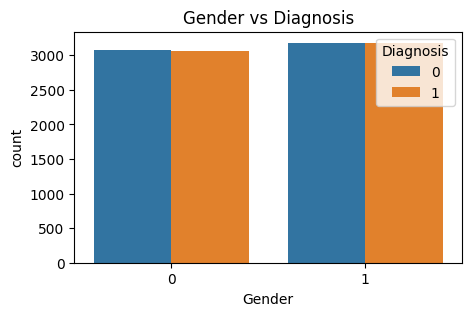

In [122]:

# Visualize Gender vs Diagnosis
if 'Gender' in data.columns:
    plt.figure(figsize=(5,3))
    sns.countplot(x='Gender', hue='Diagnosis', data=data)
    plt.title('Gender vs Diagnosis')
    plt.show()

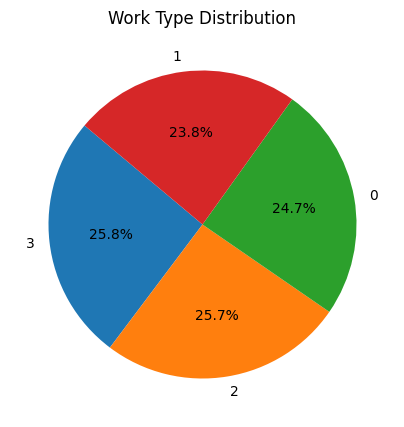

In [123]:



# Visualize Work Type as pie chart
if 'Work Type' in data.columns:
    plt.figure(figsize=(5,5))
    work_counts = data['Work Type'].value_counts()
    plt.pie(work_counts, labels=work_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Work Type Distribution')
    plt.show()



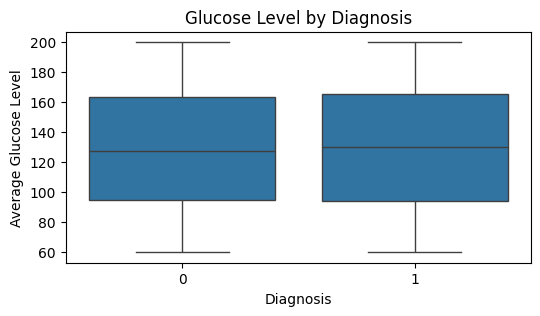

In [124]:
# Visualize Glucose Level by Diagnosis
if 'Average Glucose Level' in data.columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(x='Diagnosis', y='Average Glucose Level', data=data)
    plt.title('Glucose Level by Diagnosis')
    plt.show()

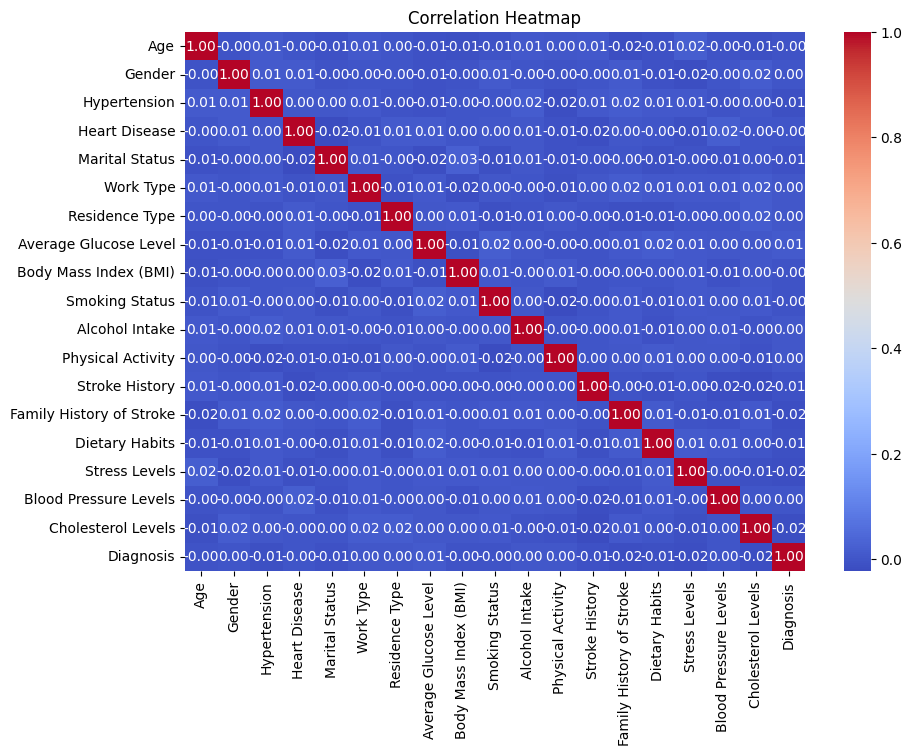

In [125]:


# Correlation heatmap for numeric features
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [126]:
# 6. Split Data into Features and Target
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
# 7. Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\Student\\Documents\\GitHub\\Stroke-Prediction\\.venv\\Lib\\site-packages\\sklearn\\utils\\_repr_html\\estimator.js'

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\Student\\Documents\\GitHub\\Stroke-Prediction\\.venv\\Lib\\site-packages\\sklearn\\utils\\_repr_html\\estimator.js'

RandomForestClassifier(random_state=42)

In [128]:
# 8. Make Predictions
y_pred = rf.predict(X_test)

In [129]:
# 9. Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.4944
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.54      0.52      1253
           1       0.49      0.45      0.47      1247

    accuracy                           0.49      2500
   macro avg       0.49      0.49      0.49      2500
weighted avg       0.49      0.49      0.49      2500

